<a href="https://colab.research.google.com/github/ruslanmv/Neural-Networks-from-Scratch/blob/master/Custom_tuner_MMORPG_AI_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner -q

In [2]:
import keras_tuner
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [3]:
def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2

In [4]:
import os
user = "ruslanmv"
repo = "Neural-Networks-from-Scratch"
# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}
!git clone https://github.com/{user}/{repo}.git

Cloning into 'Neural-Networks-from-Scratch'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 184 (delta 62), reused 37 (delta 16), pack-reused 84
Receiving objects: 100% (184/184), 317.73 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Checking out files: 100% (53/53), done.


In [5]:
#x_train = np.random.rand(1000, 28, 28, 1)
#x_val = np.random.rand(1000, 28, 28, 1)

#y_train = np.random.randint(0, 29, (1000, 1))
#y_val = np.random.randint(0,  29, (1000, 1))


In [6]:
#x_train.shape
#(1000, 28, 28, 1)

In [7]:
#y_train.shape
#(1000, 1)

In [8]:
x_train = np.random.rand(200, 270, 480, 3)
#x_val = np.random.rand(200, 270, 480, 3)
x_val = np.random.rand(50, 270, 480, 3)

In [33]:
y_train = np.random.randint(0, 29, (200, 1))
#y_val = np.random.randint(0,  29, (200, 1))
y_val = np.random.randint(0,  29, (50, 1))

In [116]:
y_train = np.random.randint(0,  2, (200, 29))
y_train.shape


(200, 29)

In [117]:
y_val = np.random.randint(0,  2, (50, 29))
y_val.shape

(50, 29)

In [12]:
type(y_train)

numpy.ndarray

In [13]:
#x_train.shape
#(200, 270, 480, 3)

In [14]:
import os
os.chdir('Neural-Networks-from-Scratch')

In [15]:
#We define the parameters
width= 480
height= 270
ncolors=3

In [16]:
import pandas as pd
#Importing Gamepad library
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,width,height,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,width,height,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

In [18]:
#x_train = X_image
#x_val=  test_image

In [19]:
x_train.shape
#(200, 270, 480, 3)

(200, 270, 480, 3)

In [20]:
x_val.shape
#(50, 270, 480, 3)

(50, 270, 480, 3)

In [21]:
#y_train = np.array(Y)
#y_val = np.array(test_y)

In [22]:
y_train.shape
#(200, 29)

(200, 29)

In [23]:
y_val.shape
#(200, 29)

(50, 1)

In [24]:
type(y_train)

pandas.core.frame.DataFrame

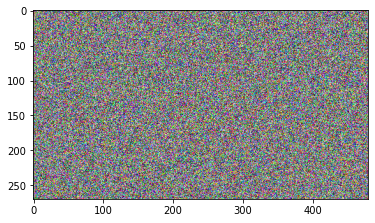

In [25]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='binary')
#plt.xlabel(y_train[0])
plt.show()

In [26]:


#Normalization Parameter
Norma        = 29/1000
#Paramters                          Operation 
filters1     =  roundeven(96*Norma)   #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11


dropout13=0.5
dropout15=0.5
learning_rate17=0.001
np.random.seed(1000)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [128]:
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        """Builds a convolutional model."""

        #input_shape=(height, width, ncolors)
        #input_shape = (28, 28, 1)
        input_shape =(270, 480, 3)

        # create model
        '''
        model = Sequential()
        model.add(Conv2D(filters=filters1, input_shape=(height, width, ncolors), kernel_size=(11,11), strides=(stride1,stride1), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(kernel2,kernel2), strides=(stride2,stride2), padding='same'))
        #Passing it to a Fully Connected layer
        model.add(Flatten())
        # 1st Fully Connected Layer
        model.add(Dense(activation9, input_shape=(270, 480, 3,)))
        model.add(keras.layers.Dense(hp.Choice('units', [8, 16, 32]),activation='relu'))
        model.add(keras.layers.Dense(29, activation='relu'))
        model.compile(loss='mse')
        return model
        '''
        model = Sequential()
        #1rd Convolutional Layer
        model.add(Conv2D(filters=filters1, input_shape=input_shape, kernel_size=(11,11), strides=(stride1,stride1), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(kernel2,kernel2), strides=(stride2,stride2), padding='same'))
        #2rd Convolutional Layer
        model.add(Conv2D(filters=filters3, kernel_size=(kernel3, kernel3), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(kernel4,kernel4), strides=(stride4,stride4), padding='same'))
        #3rd Convolutional Layer
        model.add(Conv2D(filters=filters5, kernel_size=(kernel5,kernel5), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        #4th Convolutional Layer
        model.add(Conv2D(filters=filters6, kernel_size=( kernel6, kernel6), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        #5th Convolutional Layer
        model.add(Conv2D(filters=filters7, kernel_size=(kernel7,kernel7),  padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(kernel8,kernel8), strides=(stride8,stride8), padding='same'))
        #Passing it to a Fully Connected layer
        model.add(Flatten())
        # 1st Fully Connected Layer
        model.add(Dense(activation9, input_shape=(270, 480, 3,)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        # Add Dropout to prevent overfitting
        model.add(Dropout(dropout13))
        #2nd Fully Connected Layer
        model.add(Dense(activation10))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        #Add Dropout
        model.add(Dropout(dropout15))
        #3rd Fully Connected Layer
        model.add(Dense(hp.Choice('units', [8, 16, 32])))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        #Add Dropout
        model.add(Dropout(dropout15))
        #Output Layer
        model.add(Dense(29))
        model.add(BatchNormalization())
        model.add(Activation('softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model




    def fit(self, hp, model, x, y, validation_data, callbacks=None, **kwargs):
        # Convert the datasets to tf.data.Dataset.
        batch_size = hp.Int("batch_size", 32, 128, step=32, default=64)
        train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(
            batch_size
        )
        validation_data = tf.data.Dataset.from_tensor_slices(validation_data).batch(
            batch_size
        )

        # Define the optimizer.
        optimizer = keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log", default=1e-3)
        )
        loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

        # The metric to track validation loss.
        epoch_loss_metric = keras.metrics.Mean()

        # Function to run the train step.
        @tf.function
        def run_train_step(images, labels):
            with tf.GradientTape() as tape:
                logits = model(images)
                loss = loss_fn(labels, logits)
                # Add any regularization losses.
                if model.losses:
                    loss += tf.math.add_n(model.losses)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Function to run the validation step.
        @tf.function
        def run_val_step(images, labels):
            logits = model(images)
            loss = loss_fn(labels, logits)
            # Update the metric.
            epoch_loss_metric.update_state(loss)

        # Assign the model to the callbacks.
        for callback in callbacks:
            callback.model = model

        # Record the best validation loss value
        best_epoch_loss = float("inf")

        # The custom training loop.
        for epoch in range(2):
            print(f"Epoch: {epoch}")

            # Iterate the training data to run the training step.
            for images, labels in train_ds:
                run_train_step(images, labels)

            # Iterate the validation data to run the validation step.
            for images, labels in validation_data:
                run_val_step(images, labels)

            # Calling the callbacks after epoch.
            epoch_loss = float(epoch_loss_metric.result().numpy())
            for callback in callbacks:
                # The "my_metric" is the objective passed to the tuner.
                callback.on_epoch_end(epoch, logs={"my_metric": epoch_loss})
            epoch_loss_metric.reset_states()

            print(f"Epoch loss: {epoch_loss}")
            best_epoch_loss = min(best_epoch_loss, epoch_loss)

        # Return the evaluation metric value.
        return best_epoch_loss


In [129]:
tuner = keras_tuner.RandomSearch(
    objective=keras_tuner.Objective("my_metric", "min"),
    max_trials=2,
    hypermodel=MyHyperModel(),
    directory="results",
    project_name="custom_training",
    overwrite=True,
)


In [119]:
x_train.shape,y_train.shape

((200, 270, 480, 3), (200, 29))

In [120]:
x_val.shape, y_val.shape

((50, 270, 480, 3), (50, 29))

In [121]:
y_train.shape, y_val.shape

((200, 29), (50, 29))

In [88]:
#y_train =  np.asarray(Y)
#y_val   =  np.asarray(test_y)






In [115]:
n_class = 29
n_sample = 50
#y_train = pd.get_dummies(np.random.randint(0,n_class, n_sample)).values
y_train.shape

(200, 29)

In [122]:
y_train

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0]])

In [123]:
n_class = 29
n_sample = 200
#y_train = pd.get_dummies(np.random.randint(0,n_class, n_sample)).values
y_train.shape

(200, 29)

In [130]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
8                 |?                 |units

Epoch: 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: ignored

In [126]:
tuner.search(x=x_train, y=y_train, validation_data=(x_val, y_val))



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
16                |?                 |units
64                |?                 |batch_size
0.001             |?                 |learning_rate

Epoch: 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: ignored

In [44]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'units': 8, 'batch_size': 96, 'learning_rate': 0.00014400420008165156}


In [45]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 120, 4)        1456      
                                                                 
 batch_normalization (BatchN  (None, 68, 120, 4)       16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 68, 120, 4)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 60, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 60, 8)         808       
                                                                 
 batch_normalization_1 (Batc  (None, 34, 60, 8)        3

https://keras.io/guides/keras_tuner/custom_tuner/
https://medium.datadriveninvestor.com/hyperparameter-tuning-with-keras-tuner-3a609d3fd85b
https://discuss.tensorflow.org/t/unknown-metric-val-accuracy-using-keras-tuner-error/5991
https://github.com/keras-team/keras-tuner/issues/627
https://github.com/keras-team/keras-tuner/issues/631
https://www.tensorflow.org/tutorials/keras/keras_tuner

https://keras.io/guides/writing_a_training_loop_from_scratch/
https://www.programcreek.com/python/example/104424/keras.callbacks.EarlyStopping
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
https://stackoverflow.com/questions/70010008/unknown-metric-val-accuracy-using-keras-tuner
https://github.com/keras-team/keras-io/blob/master/guides/keras_tuner/custom_tuner.py

https://github.com/keras-team/keras-tuner